In [5]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# set display options
pd.set_option('display.max_columns', None)

In [6]:
#import dataset
X_train = pd.read_pickle('./data/X_train.pkl')
y_train = pd.read_pickle('./data/y_train.pkl')

X_test = pd.read_pickle('./data/X_test.pkl')
y_test = pd.read_pickle('./data/y_test.pkl')


In [7]:
train_set = pd.concat([X_train, y_train], axis=1)

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and asian_pop")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'value ~ asian_pop', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and asian_pop
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4686.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:17:31   Log-Likelihood:            -1.4297e+05
No. Observations:               18273   AIC:                         2.859e+05
Df Residuals:                   18271   BIC:                         2.860e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and income_per_capita")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'value ~ income_per_capita', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and income_per_capita
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     5762.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:17:31   Log-Likelihood:            -1.4255e+05
No. Observations:               18273   AIC:                         2.851e+05
Df Residuals:                   18271   BIC:                         2.851e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

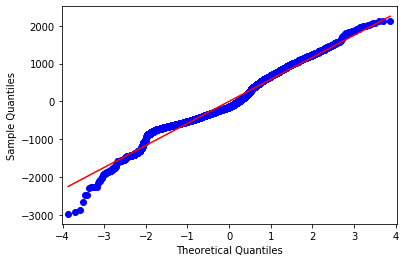

In [10]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

In [1]:
# simple plot of residuals
import seaborn as sns

sns.residplot('value', 'income_per_capita', data=train_set)

NameError: name 'train_set' is not defined

In [12]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train_set.shape, "\n")
print ("Column Headers:", list(train_set.columns.values), "\n")
print (train_set.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (18273, 27) 

Column Headers: ['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita', 'vacant_housing_units_for_rent', 'percent_income_spent_on_rent', 'high_school_diploma', 'associates_degree', 'bachelors_degree', 'masters_degree', 'year', 'population_change', 'natural_amenity_rank', 'value'] 

Season                             int64
AGIncome                         float64
TotIncome                        float64
SalariesWages                    float64
NumUnemply                       float64
TotTaxes                         float64
Unemploy-\nment Rate\n(%)        float64
MortDeliq30-89                   float64
MortDeliq90                      float64
total_pop                        float64


In [13]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train_set:
    # Find all the unique feature values
    uniq = train_set[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train_set[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'Season' has 4 unique values
[2 4 3 1]

-----------------------------------------------------------------------

'AGIncome' has 1570 unique values
~~Listing up to 10 unique values~~
[12955.02673532 12229.73339229 36911.96854916  9646.84376594
 19307.99098137  5324.56207892  4073.30611386  3179.96360431
  6261.40525653  3672.63082647]

-----------------------------------------------------------------------

'TotIncome' has 1570 unique values
~~Listing up to 10 unique values~~
[13218.01296857 12425.94943631 37386.22102286  9752.24837984
 19603.08769432  5397.11046947  4116.92579348  3210.70337211
  6367.1413363   3713.68946077]

-----------------------------------------------------------------------

'SalariesWages' has 1570 unique values
~~Listing up to 10 unique values~~
[ 8087.70033834  8802.07694393 16769.7353448   7788.30433112
 10784.21502314  4129.5561972   3177.27237957  2553.63003866
  4751.82884546  3181.76634011]

-------------------------------------

In [14]:
# Check for duplicate index or rows
idsUnique = len(set(train_set.index))
idsTotal = train_set.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 18273 total entries


In [15]:
#get summary of numerical variables
train_set.describe()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,year,population_change,natural_amenity_rank,value
count,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.0,18273.000000,18273.000000,18273.000000
mean,2.333388,7344.888573,7445.221561,4742.541198,2.632281,455.256207,4.229563,1.855239,1.309765,38890.467739,36.111673,0.502931,0.154068,0.085635,0.222656,0.464850,36443.958682,0.056616,31.386291,0.129203,0.049108,0.163115,0.077859,2017.0,1.712490,4.135446,1596.691950
std,0.942148,7382.173494,7479.043288,3268.597377,1.494023,764.666435,0.928697,0.776579,0.671681,19178.692249,5.234877,0.254833,0.192211,0.100771,0.206171,0.052557,18918.096497,0.036919,4.963939,0.054471,0.018718,0.082522,0.051181,0.0,5.060268,1.483228,678.204087
min,1.000000,940.704324,950.467225,803.082287,0.348675,4.058808,2.100000,0.300000,0.000000,2029.000000,21.000000,0.004824,0.000000,0.000000,0.003516,0.312100,10490.000000,0.000000,19.000000,0.008520,0.006083,0.014644,0.002431,2017.0,-0.931333,1.000000,0.000000
25%,2.000000,3473.688172,3509.926809,2685.996373,1.602828,114.707771,3.500000,1.400000,0.700000,24988.000000,32.900000,0.304375,0.031047,0.022590,0.072116,0.427600,23671.000000,0.032627,27.800000,0.085970,0.035705,0.098913,0.038847,2017.0,-0.134263,3.000000,1133.000000
50%,2.000000,5000.597510,5069.228283,3674.103420,2.364993,240.371641,4.100000,1.900000,1.200000,35885.000000,35.700000,0.541596,0.078832,0.049879,0.152011,0.459600,31067.000000,0.049478,30.700000,0.130057,0.047857,0.152919,0.067361,2017.0,0.323286,3.000000,1452.000000
75%,3.000000,8297.599341,8440.823937,5824.217112,3.457481,499.498026,4.800000,2.200000,1.900000,49354.000000,39.100000,0.713452,0.189455,0.108076,0.304789,0.496700,45388.000000,0.072889,34.200000,0.169692,0.060931,0.218491,0.107971,2017.0,1.362111,5.000000,2076.000000
max,4.000000,65092.982114,65834.988801,35905.455475,19.330661,8394.169074,9.200000,6.400000,3.600000,114647.000000,67.400000,0.973506,0.982393,0.726602,0.977026,0.685700,154723.000000,0.487710,50.000000,0.279457,0.126473,0.462318,0.344235,2017.0,67.122977,7.000000,4634.000000


In [16]:
# Skewness of the distribution

print(train_set.skew())

# Values close to 0 show less skew


Season                           0.488462
AGIncome                         3.762766
TotIncome                        3.745286
SalariesWages                    2.701689
NumUnemply                       2.863257
TotTaxes                         5.496531
Unemploy-\nment Rate\n(%)        0.801389
MortDeliq30-89                   0.991756
MortDeliq90                      0.272457
total_pop                        0.935468
median_age                       0.816945
white_pop                       -0.324771
black_pop                        2.193935
asian_pop                        2.433503
hispanic_pop                     1.477065
gini_index                       0.496008
income_per_capita                1.750072
vacant_housing_units_for_rent    3.091736
percent_income_spent_on_rent     0.758049
high_school_diploma              0.050674
associates_degree                0.449707
bachelors_degree                 0.558816
masters_degree                   0.971847
year                             0

In [17]:
# Skewness of the distribution

print(train_set.kurt())

Season                           -0.652273
AGIncome                         18.951179
TotIncome                        18.792781
SalariesWages                    12.688097
NumUnemply                       22.777986
TotTaxes                         39.724436
Unemploy-\nment Rate\n(%)         2.428903
MortDeliq30-89                    2.848663
MortDeliq90                      -0.955194
total_pop                         0.999822
median_age                        3.555704
white_pop                        -0.946446
black_pop                         4.829180
asian_pop                         7.154058
hispanic_pop                      1.711004
gini_index                        0.216186
income_per_capita                 4.465414
vacant_housing_units_for_rent    24.357198
percent_income_spent_on_rent      0.832368
high_school_diploma              -0.685338
associates_degree                 0.191777
bachelors_degree                 -0.194034
masters_degree                    0.801034
year       

In [18]:
#Check when a value in a cloumn is zero
train_set[(train_set['value'] == 0)].count()

Season                           333
AGIncome                         333
TotIncome                        333
SalariesWages                    333
NumUnemply                       333
TotTaxes                         333
Unemploy-\nment Rate\n(%)        333
MortDeliq30-89                   333
MortDeliq90                      333
total_pop                        333
median_age                       333
white_pop                        333
black_pop                        333
asian_pop                        333
hispanic_pop                     333
gini_index                       333
income_per_capita                333
vacant_housing_units_for_rent    333
percent_income_spent_on_rent     333
high_school_diploma              333
associates_degree                333
bachelors_degree                 333
masters_degree                   333
year                             333
population_change                333
natural_amenity_rank             333
value                            333
d

In [19]:
df = train_set[['income_per_capita','value']]

In [20]:
df.head()


,income_per_capita,value
0,68995.0,3727.0
1,69983.0,1735.0
2,114641.0,3609.0
3,48249.0,1214.0
4,73991.0,1836.0


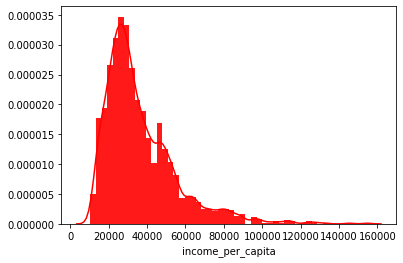

In [21]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['income_per_capita'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

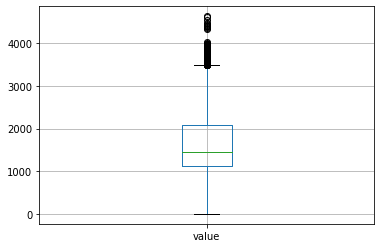

In [22]:
train_set.boxplot(column="value")
#sns.boxplot(x='value', y='Year', data=train_set)

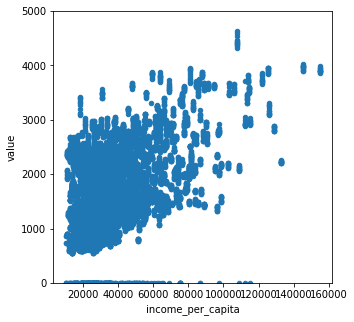

In [23]:
train_set.plot(kind="scatter",     # Create a scatterplot
              x="income_per_capita",          # Put carat on the x axis
              y="value",          # Put price on the y axis
              figsize=(5,5),
              ylim=(0,5000))